**Titanic Kaggle Data Exploration**

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [120]:
df = pd.read_csv("train.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S


In [121]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


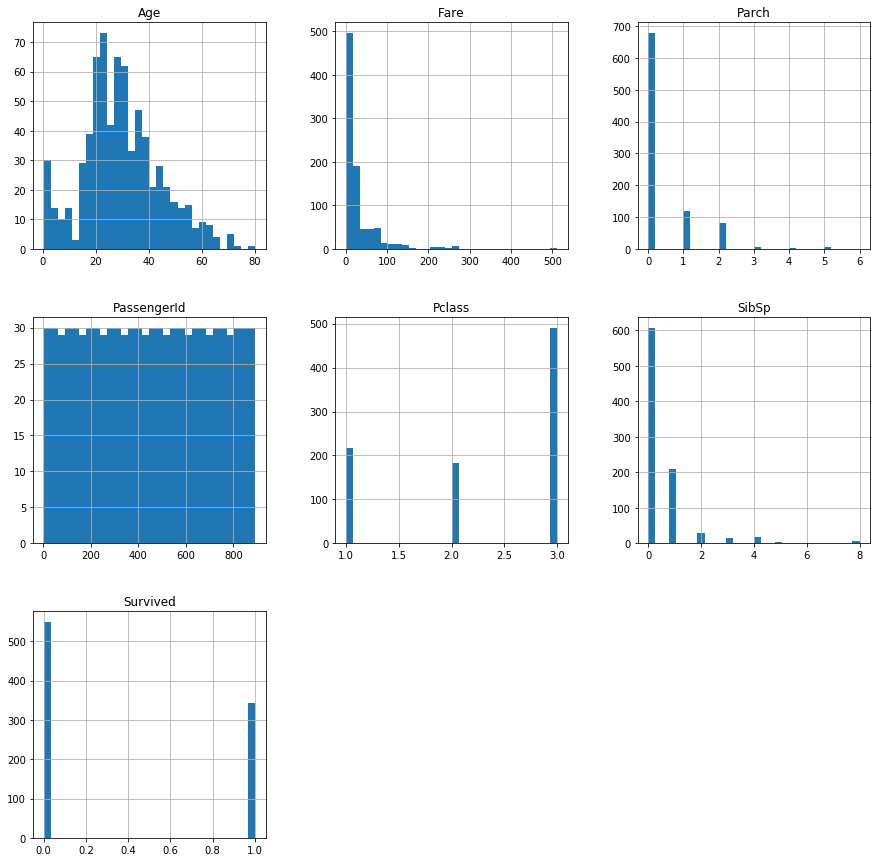

In [122]:
df.hist(bins = 30, figsize = (15, 15))
plt.show()

In [127]:
survbygenp = pd.crosstab(df['Sex'], df['Survived']).apply(lambda x: x/x.sum())
survbygenp

Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [124]:
survbygenc = pd.pivot_table(df, values = 'PassengerId', index = 'Sex', columns = 'Survived', aggfunc = 'count')
survbygenc

Survived,0,1
Sex,,
female,81,233
male,468,109


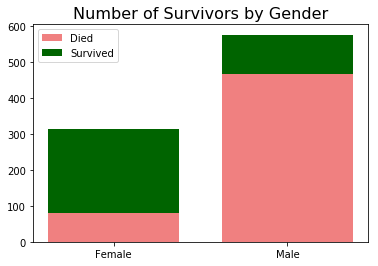

In [125]:
x_pos = np.arange(len(survbygen[0]))

first_bar = plt.bar(x_pos, survbygenc[0], .75, color = 'lightcoral')
second_bar = plt.bar(x_pos, survbygenc[1], .75, color = 'darkgreen', bottom = survbygenc[0])
plt.xticks(x_pos, ('Female','Male'))
plt.legend(['Died', 'Survived'], loc = 2)
plt.title('Number of Survivors by Gender', fontsize=16)
plt.show()